In [74]:
# ライブラリの取得
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(font="IPAexGothic",style="white")　多分いらなそう
# import oandapy
import configparser
import datetime
from datetime import datetime, timedelta

import warnings
warnings.simplefilter('ignore')

# CSVデータの読み込み
import os
working_directory=os.getcwd()
#print(working_directory)
path_train=working_directory+'/train_finance.csv'
# path_test=working_directory+'/test_finance.csv'
path_test=working_directory+'/test_finance_last10elminate.csv'
path_latest=working_directory+'/test_latest.csv'
path_submit=working_directory+'/submit_finance.csv'

#データフレームの生成
df_train=pd.read_csv(path_train)
df_test=pd.read_csv(path_test)
df_latest=pd.read_csv(path_latest)
df_submit=pd.read_csv(path_submit)

In [75]:
#データの確認
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2074 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2074 non-null   object 
 1   High    2074 non-null   float64
 2   Low     2074 non-null   float64
 3   Open    2074 non-null   float64
 4   Close   2074 non-null   float64
dtypes: float64(4), object(1)
memory usage: 81.1+ KB


In [76]:
#データの確認
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1236 non-null   object 
 1   High    1236 non-null   float64
 2   Low     1236 non-null   float64
 3   Open    1236 non-null   float64
 4   Close   1236 non-null   float64
dtypes: float64(4), object(1)
memory usage: 48.4+ KB


In [77]:
# Dateがobject型になっているので日付型に変換
df_train['Date']=pd.to_datetime(df_train['Date'],format='%Y/%m/%d')
df_test['Date']=pd.to_datetime(df_test['Date'],format='%Y/%m/%d')
df_latest['Date']=pd.to_datetime(df_latest['Date'],format='%Y/%m/%d')

In [78]:
# Dateが日付型に変更されたかどうかの確認
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2074 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2074 non-null   datetime64[ns]
 1   High    2074 non-null   float64       
 2   Low     2074 non-null   float64       
 3   Open    2074 non-null   float64       
 4   Close   2074 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 81.1 KB


In [79]:
# Dateが日付型に変更されたかどうかの確認
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1236 non-null   datetime64[ns]
 1   High    1236 non-null   float64       
 2   Low     1236 non-null   float64       
 3   Open    1236 non-null   float64       
 4   Close   1236 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 48.4 KB


In [80]:
# Dateが日付型に変更されたかどうかの確認
df_latest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    10 non-null     datetime64[ns]
 1   High    10 non-null     float64       
 2   Low     10 non-null     float64       
 3   Open    10 non-null     float64       
 4   Close   10 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 528.0 bytes


In [81]:
df_train.head()

,Date,High,Low,Open,Close
0,2003-12-01,111.370639,110.482062,111.314347,110.676377
1,2003-12-02,112.008532,110.500532,110.639316,111.823016
2,2003-12-03,112.202814,111.712284,111.832477,112.137524
3,2003-12-04,112.332259,111.406851,112.110343,111.748717
4,2003-12-05,112.766375,111.609834,111.721723,112.729259


In [82]:
#データの確認
df_train.describe()

,High,Low,Open,Close
count,2074.000000,2074.000000,2074.000000,2074.000000
mean,124.078238,122.910559,123.526205,123.529490
std,9.210193,9.493319,9.188003,9.184970
min,108.520946,6.743457,107.993884,107.998923
25%,117.002707,115.863246,116.408944,116.427990
50%,123.242134,121.951219,122.590435,122.573382
75%,130.814157,129.393252,130.201913,130.179930
max,148.260942,146.834717,147.832063,147.888796


In [83]:
#データの確認
df_test.describe()

,High,Low,Open,Close
count,1236.000000,1236.000000,1236.000000,1236.000000
mean,111.490059,110.738356,111.134670,111.135065
std,9.214735,9.281701,9.224468,9.223940
min,96.767439,70.352906,96.364197,96.357173
25%,103.778958,103.142761,103.477977,103.472478
50%,108.639479,107.891858,108.202341,108.196006
75%,120.711486,119.859603,120.326373,120.329122
max,129.417693,128.691530,128.851619,128.858797


In [84]:
#欠損値の確認
print(f'欠損データ確認(df_train)\n{df_train.isnull().sum()}\n')
print(f'欠損データを確認(df_test)\n{df_test.isnull().sum()}\n')

欠損データ確認(df_train)
Date     0
High     0
Low      0
Open     0
Close    0
dtype: int64

欠損データを確認(df_test)
Date     0
High     0
Low      0
Open     0
Close    0
dtype: int64



## Trainデータを学習用と検証用に分割
#### (しようとしたが今回はそもそもtrain:2003/12/1-2011/12/14 | test:2011/12/15-2019/12/31に分かれてるので分割不要。前者を学習用、後者を検証用に使う)

In [85]:
# 不要
# Trainデータを学習用と検証用に分割
# 今回は①学習用：8割、②検証用：2割にTrainデータを分割して、①の予測モデルで
# ②が正しく評価できるのかを確認した上で、testデータへの予測モデルの適用を行う

In [86]:
# 不要
# # train_test_splitというDataFrameを分けてくれる関数がsklearnにあるのでそれを使う
# from sklearn.model_selection import train_test_split

# df_train, df_validation = train_test_split(df_train, train_size=0.8, test_size=0.2, shuffle=False)

In [87]:
# 不要
# # 分割後のサイズ
# print(f'①学習用データのサイズ(df_train)：{len(df_train)}')
# print(f'②検証用データのサイズ(df_validation)：{len(df_validation)}')
# print(f'元々のdf_trainのサイズが8:2に分割された\n')

# # 分割後の詳細
# print(f'分割後のサマリ(df_train)\n{df_train.describe()}\n')
# print(f'分割後のサマリ(df_validation)\n{df_validation.describe()}\n')

##　LSTMモデルへ訓練させるための前処理

In [88]:
##　LSTMモデルへ訓練させるための前処理

In [89]:
# windowを設定
window_len=10

In [90]:
# # Closeの単価だけ抽出
# df_train=df_train['Close']
# df_test=df_test['Close']
# df_latest=df_latest['Close']

In [91]:
# Dateそぎ落とし
del df_train['Date']
del df_test['Date']
del df_latest['Date']

In [92]:
# 分割後の詳細
print(f'単価抽出後のサマリ(df_train)\n{df_train.describe()}\n')
print(f'単価抽出後のサマリ(df_test)\n{df_test.describe()}\n')
print(f'単価抽出後のサマリ(df_latest)\n{df_latest.describe()}\n')

単価抽出後のサマリ(df_train)
              High          Low         Open        Close
count  2074.000000  2074.000000  2074.000000  2074.000000
mean    124.078238   122.910559   123.526205   123.529490
std       9.210193     9.493319     9.188003     9.184970
min     108.520946     6.743457   107.993884   107.998923
25%     117.002707   115.863246   116.408944   116.427990
50%     123.242134   121.951219   122.590435   122.573382
75%     130.814157   129.393252   130.201913   130.179930
max     148.260942   146.834717   147.832063   147.888796

単価抽出後のサマリ(df_test)
              High          Low         Open        Close
count  1236.000000  1236.000000  1236.000000  1236.000000
mean    111.490059   110.738356   111.134670   111.135065
std       9.214735     9.281701     9.224468     9.223940
min      96.767439    70.352906    96.364197    96.357173
25%     103.778958   103.142761   103.477977   103.472478
50%     108.639479   107.891858   108.202341   108.196006
75%     120.711486   119.859603 

In [93]:
df_train.head()

,High,Low,Open,Close
0,111.370639,110.482062,111.314347,110.676377
1,112.008532,110.500532,110.639316,111.823016
2,112.202814,111.712284,111.832477,112.137524
3,112.332259,111.406851,112.110343,111.748717
4,112.766375,111.609834,111.721723,112.729259


In [94]:
# LSTMへの入力用に処理の関数

def data_maker(data):
  data_lstm_in=[]
  if len(data)==window_len:
    temp = data[:window_len].copy()
    temp = temp / temp.iloc[0] - 1
    data_lstm_in.append(temp)
  for i in range(len(data) - window_len): #今回のLSTMで生成する時系列データ数(train総数-10個のモデル)
      temp = data[i:(i + window_len)].copy() #windowの単位で行を取得。参照渡しでなく値渡し。
      temp = temp / temp.iloc[0] - 1
      data_lstm_in.append(temp)
  return data_lstm_in

In [95]:
#関数の実行(Trainデータ)
train_lstm_in = data_maker(df_train)

In [96]:
# 配列抜粋
print(f'train_lstm_in_配列数 : {len(train_lstm_in)}\n')
print(f'train_lstm_in[0]\n{train_lstm_in[0]}\n')
print(f'train_lstm_in[1]\n{train_lstm_in[1]}\n')
print(f'train_lstm_in[-1]\n{train_lstm_in[-1]}\n')

train_lstm_in_配列数 : 2064

train_lstm_in[0]
       High       Low      Open     Close
0  0.000000  0.000000  0.000000  0.000000
1  0.005728  0.000167 -0.006064  0.010360
2  0.007472  0.011135  0.004655  0.013202
3  0.008634  0.008370  0.007151  0.009689
4  0.012532  0.010208  0.003660  0.018549
5  0.016610  0.017587  0.011134  0.021312
6  0.019680  0.021261  0.015545  0.023814
7  0.018767  0.018255  0.017871  0.018884
8  0.016187  0.014984  0.013044  0.021649
9  0.022089  0.022521  0.016042  0.026240

train_lstm_in[1]
        High       Low      Open     Close
1   0.000000  0.000000  0.000000  0.000000
2   0.001735  0.010966  0.010784  0.002813
3   0.002890  0.008202  0.013296 -0.000664
4   0.006766  0.010039  0.009783  0.008104
5   0.010820  0.017417  0.017303  0.010839
6   0.013873  0.021090  0.021741  0.013316
7   0.012965  0.018085  0.024082  0.008436
8   0.010400  0.014814  0.019225  0.011173
9   0.016268  0.022350  0.022241  0.015717
10  0.017834  0.019424  0.018890  0.019108

tra

In [97]:
lstm_train_out = (df_train['Open'][window_len:].values / df_train['Open'][:-window_len].values)-1

In [98]:
lstm_train_out

array([ 0.01271095,  0.02951676,  0.01902212, ...,  0.00455942,
       -0.01066412, -0.02221258])

In [99]:
#関数の実行(Testデータ)
test_lstm_in = data_maker(df_test)

In [100]:
# 配列抜粋(Testデータ)
print(f'test_lstm_in_配列数 : {len(test_lstm_in)}\n')
print(f'test_lstm_in[0]\n{test_lstm_in[0]}\n')
print(f'test_lstm_in[1]\n{test_lstm_in[1]}\n')
print(f'test_lstm_in[-1]\n{test_lstm_in[-1]}\n')

test_lstm_in_配列数 : 1226

test_lstm_in[0]
       High       Low      Open     Close
0  0.000000  0.000000  0.000000  0.000000
1  0.002682  0.003395  0.003284  0.003205
2 -0.000613  0.001701  0.003741  0.003768
3  0.006356  0.002625  0.001587  0.001522
4  0.011123  0.005055  0.007748  0.007696
5  0.005366  0.004675  0.003898  0.004003
6 -0.008051 -0.007845 -0.004744 -0.004680
7 -0.004068 -0.004388 -0.002707 -0.002462
8 -0.006521 -0.003114 -0.002100 -0.002151
9  0.001294 -0.002057 -0.003933 -0.003623

test_lstm_in[1]
        High       Low      Open     Close
1   0.000000  0.000000  0.000000  0.000000
2  -0.003286 -0.001688  0.000456  0.000561
3   0.003664 -0.000767 -0.001691 -0.001678
4   0.008418  0.001655  0.004450  0.004476
5   0.002676  0.001276  0.000613  0.000795
6  -0.010705 -0.011202 -0.008001 -0.007860
7  -0.006732 -0.007757 -0.005971 -0.005649
8  -0.009179 -0.006487 -0.005366 -0.005340
9  -0.001385 -0.005433 -0.007193 -0.006807
10 -0.000771 -0.008064  0.001841  0.002024

test_l

In [101]:
lstm_test_out = (df_test['Open'][window_len:].values / df_test['Open'][:-window_len].values)-1

In [102]:
lstm_test_out

array([ 0.00513026, -0.00760332, -0.02393378, ...,  0.00048736,
        0.00663805,  0.00541945])

In [103]:
#関数の実行(Latestデータ)
latest_lstm_in = data_maker(df_latest)

In [104]:
# 配列抜粋
print(f'latest_lstm_in_配列数 : {len(latest_lstm_in)}\n')
print(f'latest_lstm_in\n{latest_lstm_in[0]}\n')
#print(f'latest_lstm_in\n{latest_lstm_in[1]}\n')
# print(f'latest_lstm_in\n{latest_lstm_in[-1]}\n')

latest_lstm_in_配列数 : 1

latest_lstm_in
       High       Low      Open     Close
0  0.000000  0.000000  0.000000  0.000000
1  0.003009  0.000634  0.004507  0.004508
2  0.000402  0.001046 -0.000723 -0.001023
3  0.001777  0.001714  0.000345  0.000100
4 -0.000167 -0.000044  0.001639  0.001394
5 -0.000981 -0.000178 -0.001556 -0.001790
6 -0.004342 -0.002616 -0.003428 -0.003628
7  0.002449 -0.001067 -0.002875 -0.003119
8  0.006037  0.006273  0.004338  0.004171
9  0.007858  0.007997  0.006398  0.005966



## Numpy配列への変換

In [105]:
# PandasのデータフレームからNumpy配列へ変換
train_lstm_in = [np.array(train_lstm_input) for train_lstm_input in train_lstm_in]
train_lstm_in = np.array(train_lstm_in)

test_lstm_in = [np.array(test_lstm_input) for test_lstm_input in test_lstm_in]
test_lstm_in = np.array(test_lstm_in)

In [106]:
print(f'train_lstm_in.shape[0] : {train_lstm_in.shape[0]}')
print(f'train_lstm_in.shape[1] : {train_lstm_in.shape[1]}')
print(f'train_lstm_in.shape[2] : {train_lstm_in.shape[2]}')

train_lstm_in.shape[0] : 2064
train_lstm_in.shape[1] : 10
train_lstm_in.shape[2] : 4


In [120]:
train_lstm_in

array([[[ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.00572766,  0.00016718, -0.00606419,  0.01036029],
        [ 0.00747212,  0.01113504,  0.00465466,  0.01320198],
        ...,
        [ 0.01876704,  0.01825526,  0.01787141,  0.01888387],
        [ 0.01618683,  0.01498399,  0.01304439,  0.02164884],
        [ 0.02208933,  0.0225208 ,  0.01604186,  0.02624016]],

       [[ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.00173453,  0.01096603,  0.01078424,  0.00281255],
        [ 0.0028902 ,  0.00820195,  0.0132957 , -0.00066443],
        ...,
        [ 0.0103996 ,  0.01481434,  0.01922516,  0.0111728 ],
        [ 0.0162685 ,  0.02234989,  0.02224093,  0.01571704],
        [ 0.01783419,  0.01942404,  0.01888969,  0.01910834]],

       [[ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.00115366, -0.0027341 ,  0.00248466, -0.00346723],
        [ 0.0050227 , -0.00091709, -0.00099035,  0.00527686],
        ...,
        [ 0.0145088 ,  0.01

In [108]:
# # 変数名をそのままprint関数内で表示させる関数
# def chkprint(*args):
#     for obj in args:
#         for k, v in globals().items():
#             if id(v) == id(obj):
#                 target = k
#                 break          
#     return target

# # データがどのデータ型か、列数、行数を表示する関数
# def typeInfo(targetData):
#     if (type(targetData) is pd.core.frame.DataFrame):
#         print("{} は DataFrame型".format(chkprint(targetData)))
#         print("{} の行数, 列数・・・{}\n".format(chkprint(targetData), targetData.shape))     # shapeの表示内容は、(行数, 列数)となる
#     if (type(targetData) is list):
#         print("{} は list型".format(chkprint(targetData)))
#         print("{} の行数, 列数・・・{}\n".format(chkprint(targetData), pd.DataFrame(targetData).shape))    # shapeの表示内容は、(行数, 列数)となる
#     if (type(targetData) is np.ndarray):
#         print("{} は ndarray型".format(chkprint(targetData)))
#         print("{} の行数, 列数・・・{}\n".format(chkprint(targetData), targetData.shape))     # shapeの表示内容は、(行数, 列数)となる
#     if (type(targetData) is pd.core.series.Series):
#         print("{} は Series型".format(chkprint(targetData)))
#         print("{} の行数, 列数・・・{}\n".format(chkprint(targetData), targetData.shape))     # shapeの表示内容は、(行数, 列数)となる

In [109]:
# typeInfo(train_lstm_in)

## モデルの定義

In [110]:
# モデルの定義
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [111]:
# LSTMのモデルを設定
def build_model(inputs, output_size, neurons, activ_func="linear",
                dropout=0.25, loss="mae", optimizer="adam"):
    model = Sequential()
 
    model.add(LSTM(neurons, input_shape=(inputs.shape[1], inputs.shape[2]))) #バッチ数、時系列データ数、特徴量数
    model.add(Dropout(dropout)) 
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))
 
    model.compile(loss=loss, optimizer=optimizer)
    return model

## データの学習と予測

In [112]:
np.random.seed(202)
 
# 初期モデルの構築
yen_model = build_model(train_lstm_in, output_size=1, neurons = 20)

# データを流してフィッティングさせる
yen_history = yen_model.fit(train_lstm_in, lstm_train_out, 
                            epochs=10, batch_size=1, verbose=2, shuffle=False)
# 11/5 epochs=50からepochs=10に変更
# 11/5 shuffle=TrueからFalseに変更

Epoch 1/10
2064/2064 - 5s - loss: 0.0082
Epoch 2/10
2064/2064 - 4s - loss: 0.0064
Epoch 3/10
2064/2064 - 4s - loss: 0.0059
Epoch 4/10
2064/2064 - 4s - loss: 0.0052
Epoch 5/10
2064/2064 - 4s - loss: 0.0052
Epoch 6/10
2064/2064 - 4s - loss: 0.0049
Epoch 7/10
2064/2064 - 4s - loss: 0.0051
Epoch 8/10
2064/2064 - 4s - loss: 0.0048
Epoch 9/10
2064/2064 - 4s - loss: 0.0046
Epoch 10/10
2064/2064 - 4s - loss: 0.0045


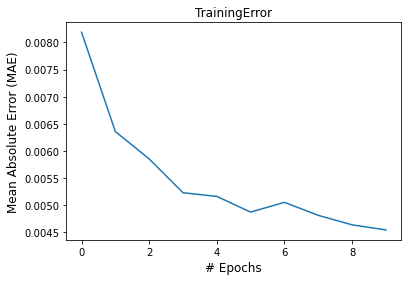

In [121]:
# MAEをプロットしてみよう
fig, ax1 = plt.subplots(1,1)
 
ax1.plot(yen_history.epoch, yen_history.history['loss'])
ax1.set_title('TrainingError')
 
if yen_model.loss == 'mae':
    ax1.set_ylabel('Mean Absolute Error (MAE)',fontsize=12)
else:
    ax1.set_ylabel('Model Loss',fontsize=12)
ax1.set_xlabel('# Epochs',fontsize=12)
plt.show()

In [113]:
len(df_latest)

10

In [114]:
length=len(df_latest)

## ここから先は以下のエラーがまだ未解決

### ValueError: Input 0 of layer sequential is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 4)

In [118]:
# #未来の値
empty = []
future_array = np.array(empty)
for i in range(length):
  pred = (((np.transpose(yen_model.predict(latest_lstm_in))+1) * latest['Open'].values[0])[0])[0]
  future_array= np.append(future_array,pred)
  data ={'Open':[pred]}
  df1 = pd.DataFrame(data)
  latest =pd.concat([latest,df1],axis=0)
  latest.index = range(0,window_len+1)
  latest = latest.drop(0,axis=0)
  latest_lstm_in =pd_to_np(latest_lstm_in)

In [119]:
# # plt.figure(figsize=(10,8))


# plt.plot(df_train[df_train['Date']< split_date]['Date'][window_len:].astype(datetime),
#          df_train['Open'][window_len:], label='Actual', color='blue')
# plt.plot(df[df['Date']< split_date]['Date'][window_len:].astype(datetime),
#          ((np.transpose(yen_model.predict(train_lstm_in))+1) * train['Open'].values[:-window_len])[0], 
#          label='Predicted', color='red')
# plt.show()